In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import pandas as pd

In [2]:
datosFull = pd.read_csv('USArrests.csv')
datosNum = datosFull[['Murder','Assault','UrbanPop','Rape']]

In [3]:
normalizado = np.subtract(datosNum,np.mean(datosNum))
normalizado = np.divide(normalizado,np.std(normalizado))

In [4]:
matriz_cov = np.cov(normalizado.T)
autoval, autovec = la.eig(matriz_cov)
autovec = autovec.T
orden = np.argsort(autoval)
autoval = autoval[orden]
autovec = autovec[orden]

In [5]:
PCL_1 = autovec[-1]
PCL_2 = -autovec[-2]

headers = datosNum.columns
valores = normalizado.values

print(PCL_1,PCL_2)

[0.53589947 0.58318363 0.27819087 0.54343209] [-0.41818087 -0.1879856   0.87280619  0.16731864]


0.9855658845031428 -1.1333923777099708


Text(0, 0.5, 'Segundo Componente Principal')

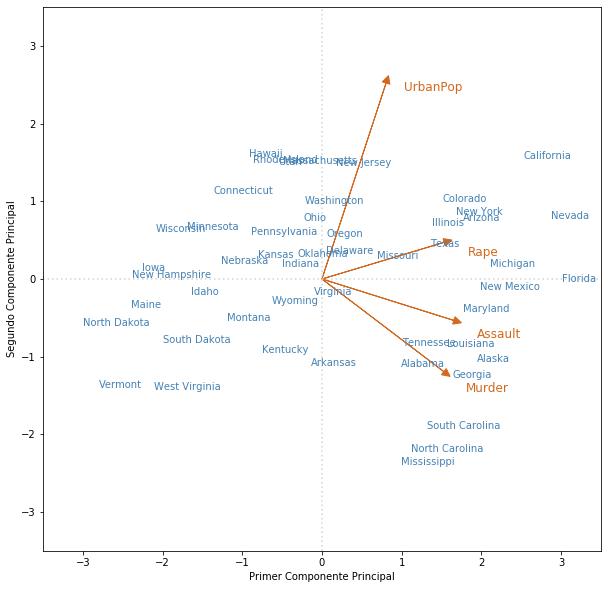

In [6]:
plt.figure(figsize=(10,10))

#print(PCL_1,PCL_2)

for i in range(len(valores)):   
    x = np.dot(PCL_1,valores[i])
    y = np.dot(PCL_2,valores[i])
    plt.text(x,y,datosFull['Unnamed: 0'][i],color="steelblue")
    plt.scatter(x,y,s=0.0001)
    
for i in range(PCL_1.size):
    x = PCL_1[i]*3
    y = PCL_2[i]*3
    plt.arrow(0,0,x,y, length_includes_head=True,head_width=0.1,head_length=0.1,fc="chocolate",ec="chocolate",color="chocolate")
    plt.annotate(headers[i],xy=(x+0.2,y-0.2),fontsize=12,color="chocolate")

x = np.dot(PCL_1,valores[0])
y = np.dot(PCL_2,valores[0])
print(x,y)
#plt.text(x,y,datosFull['Unnamed: 0'][0],fontsize=10,color="blue")

plt.ylim(-3.5,3.5)
plt.xlim(-3.5,3.5)
plt.axhline(0,color='lightgray',dashes=(1,1,0,1))
plt.axvline(0,color='lightgray',dashes=(1,1,0,1))

plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')